This notebook shows a simple example of performing a simulation 'run', recording the full simulation state during the simulation, and serializing the result to a python pickle.

In [2]:
# Cross-notebook include shim
with open("nbinclude.ipynb") as nbinclude_f: # don't rename nbinclude_f
    import IPython.nbformat.current
    get_ipython().run_cell(IPython.nbformat.current.read(nbinclude_f, 'json').worksheets[0].cells[0].input)

In [3]:
nbinclude('Narwhal')
n0 = Narwhal(0)
n1 = Narwhal(1)

In [4]:
%matplotlib inline

We generate control signals.

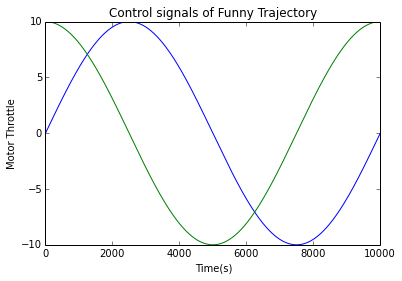

In [6]:
ts = np.linspace(0, 2*math.pi, 10000)
ls = 10.* np.sin(ts)
rs = 10.* np.cos(ts)
plt.plot(ls)
plt.plot(rs)
plt.title('Control signals of Funny Trajectory')
plt.xlabel('Time(s)')
plt.ylabel('Motor Throttle')

Now we are interested in seeing the robot's trajectory. We make an array to store the data:

In [7]:
# time(seconds), x(m), y(m), Rx, Ry, Rz, u_l, u_r
traj = np.ndarray(shape=(len(ts), 8))

We use a simple synchronous runtime to make recording full state simple.

In [8]:
vrep.simxStartSimulation(Narwhal.cid, vrep.simx_opmode_oneshot_wait)
t0 = time.time()
for i in xrange(len(ts)):
    
    t = time.time() - t0
    
    # act
    n0.drive(ls[i], rs[i])
    
    # Record data.
    x,y,z = n0._get_position('zumo')
    rx, ry, rz = n0._get_euler_angles('zumo')
    traj[i] = t, x, y, rx, ry, rz, ls[i], rs[i]
    
    # sleep until next loop
    time.sleep(.001)
n0.drive(0,0)
vrep.simxStopSimulation(Narwhal.cid, vrep.simx_opmode_oneshot_wait)

0

Now we can visualize the trajectory in matplotlib!

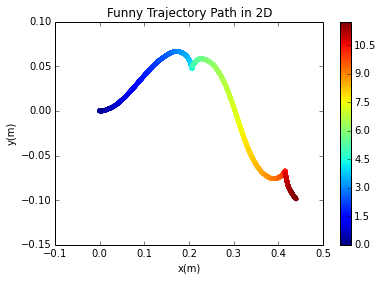

In [9]:
plt.scatter(traj.T[1],
            traj.T[2],
            linewidths=0,
            c=traj.T[0])
plt.colorbar() # Color is time.
plt.title('Funny Trajectory Path in 2D')
plt.xlabel('x(m)')
plt.ylabel('y(m)')

Finally, we serialize the trajectory in a pickle.

In [10]:
import pickle
f = open('funny_traj.pkl', 'w')
pickle.dump(traj, f)
f.close()

In [1]:
!du -h funny_traj.pkl

1.9M	funny_traj.pkl


In [2]:
!gzip funny_traj.pkl

In [3]:
!du -h funny_traj.pkl.gz

300K	funny_traj.pkl.gz
